# Package

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Importation des données de TRAIN stationnaires et normalisées

In [64]:
df_stationary_normalized_train = pd.read_csv("df_stationary_normalized_train.csv", index_col="date")
df_stationary_normalized_train.index = pd.to_datetime(df_stationary_normalized_train.index)

# Analyse globale

In [65]:
df_stationary_normalized_train.describe()

,UNRATE,TB3MS,RPI,INDPRO,DPCERA3M086SBEA,S&P 500,BUSLOANS,CPIAUCSL,OILPRICEx,M2SL
count,6.110000e+02,6.110000e+02,6.100000e+02,6.100000e+02,6.100000e+02,6.100000e+02,610.000000,6.100000e+02,6.100000e+02,6.100000e+02
mean,-2.761930e-17,-1.162918e-17,-5.824121e-18,-2.912060e-17,4.368091e-17,-3.494472e-17,0.000000,1.146624e-17,2.038442e-17,-6.988945e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.849027e+00,-1.004830e+01,-5.728296e+00,-5.569240e+00,-5.070061e+00,-6.410365e+00,-4.147238,-4.858369e+00,-5.397252e+00,-3.183122e+00
25%,-5.796727e-01,-2.513813e-01,-3.642159e-01,-4.626765e-01,-5.507995e-01,-4.961863e-01,-0.549620,-5.189437e-01,-1.488107e-01,-6.175705e-01
50%,-3.478036e-02,3.164090e-02,3.080756e-02,6.553014e-02,3.444373e-03,7.273446e-02,0.038926,-3.613037e-03,-7.076897e-02,-9.561981e-03
75%,5.101120e-01,3.364340e-01,4.127625e-01,5.274084e-01,5.919130e-01,6.333522e-01,0.582189,5.764259e-01,2.494425e-01,5.463296e-01
max,4.869251e+00,5.692084e+00,7.264659e+00,6.826997e+00,4.071328e+00,2.987820e+00,3.937471,6.452734e+00,1.139688e+01,6.309023e+00


D'après ce tableau, le minimum de TB3MS s'écarte drastiquement des 25% valeurs les plus faibles. Il en est ainsi pour RPI. 

Est-ce qu'il y a beaucoup de valeurs qui s'écartent de la majorité dans les autres variables? Pourrait-on généraliser celà? 

df_stationary_normalized.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

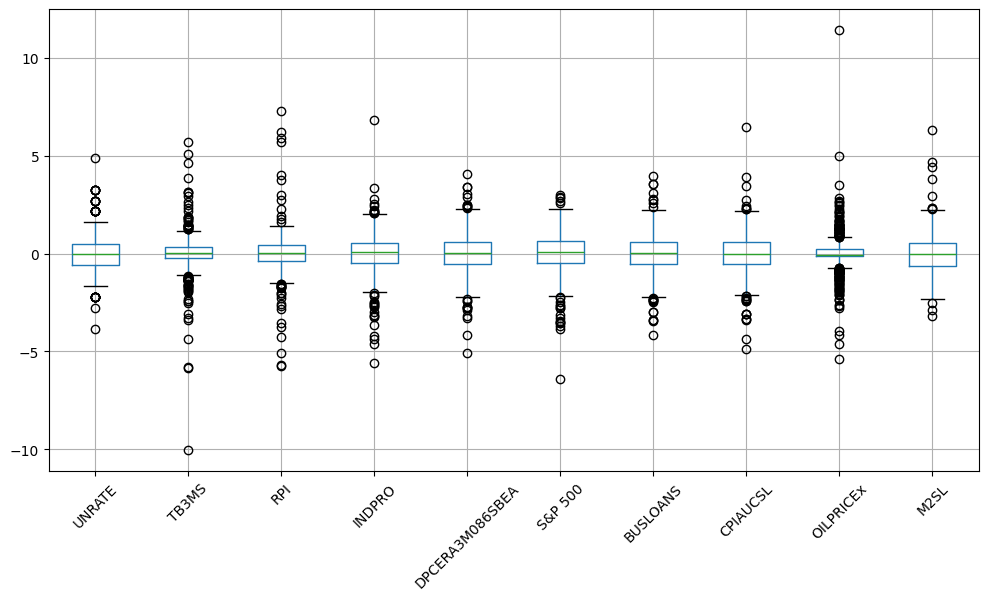

In [66]:
df_stationary_normalized_train.boxplot(figsize=(12, 6))
plt.xticks(rotation=45)
plt.show()

Effectivement, des valeurs extrêmes sont présentes presques partout. 

Ces valeurs correspondent à des évènements particuliers? 

# Vérifier si les minimum et maximum correspondent aux années de crises de l'USA

In [67]:
df_train = pd.read_csv("df_train.csv", index_col="date")
df_train.index = pd.to_datetime(df_train.index)

In [68]:
# --- Valeurs minimales ---
min_values = []
for col in df_stationary_normalized_train.columns:
    idx = df_stationary_normalized_train[col].idxmin()
    val = df_stationary_normalized_train.loc[idx, col]
    min_values.append({"Variable": col, "Date_min": idx, "Valeur_min": val})

df_stationary_normalized_train_min = pd.DataFrame(min_values)

Les minimums des variables sont enregistrés en : 1983, 1980, 1993, 2008, 1987, 1973, 1986, 1970

In [69]:
# --- Valeurs maximales ---
max_values = []
for col in df_stationary_normalized_train.columns:
    idx = df_stationary_normalized_train[col].idxmax()
    val = df_stationary_normalized_train.loc[idx, col]
    max_values.append({"Variable": col, "Date_max": idx, "Valeur_max": val})

df_stationary_normalized_train_max = pd.DataFrame(max_values)

Les maximums des variables sont enregistrées en : 1975, 1981, 2008, 1959, 2001, 2009, 1973, 1974, 1983.

In [70]:
# --- Génération automatique du commentaire avec print ---

print("### Commentaire sur les valeurs extrêmes (minimales et maximales)\n")
print("Les valeurs extrêmes des différentes séries correspondent en grande partie "
      "aux grandes récessions, chocs pétroliers et crises financières aux États-Unis.\n")

for i in range(len(df_stationary_normalized_train_min)):
    var = df_stationary_normalized_train_min.loc[i, "Variable"]

    date_min = df_stationary_normalized_train_min.loc[i, "Date_min"].date()
    val_min = df_stationary_normalized_train_min.loc[i, "Valeur_min"]

    date_max = df_stationary_normalized_train_max.loc[i, "Date_max"].date()
    val_max = df_stationary_normalized_train_max.loc[i, "Valeur_max"]

    print(f"- **{var}**")
    print(f"  - Min ({date_min}, {val_min:.2f})")
    print(f"  - Max ({date_max}, {val_max:.2f})\n")

print("---\n")
print("**En résumé :**")
print("- Les valeurs minimales coïncident avec les phases de récession (1970, 1973-75, 1981-82, 1990-91, 2008-09) "
      "et les ajustements liés aux chocs pétroliers (1973, 1986).")
print("- Les valeurs maximales apparaissent dans des périodes de tension (inflation des années 70, taux élevés début 80) "
      "ou de reprise (1983, 2001, 2009).")


### Commentaire sur les valeurs extrêmes (minimales et maximales)

Les valeurs extrêmes des différentes séries correspondent en grande partie aux grandes récessions, chocs pétroliers et crises financières aux États-Unis.

- **UNRATE**
  - Min (1983-07-01, -3.85)
  - Max (1975-01-01, 4.87)

- **TB3MS**
  - Min (1980-05-01, -10.05)
  - Max (1981-05-01, 5.69)

- **RPI**
  - Min (1993-01-01, -5.73)
  - Max (2008-05-01, 7.26)

- **INDPRO**
  - Min (2008-09-01, -5.57)
  - Max (1959-12-01, 6.83)

- **DPCERA3M086SBEA**
  - Min (1987-01-01, -5.07)
  - Max (2001-10-01, 4.07)

- **S&P 500**
  - Min (2008-10-01, -6.41)
  - Max (2009-04-01, 2.99)

- **BUSLOANS**
  - Min (2009-07-01, -4.15)
  - Max (1973-02-01, 3.94)

- **CPIAUCSL**
  - Min (1973-09-01, -4.86)
  - Max (1973-08-01, 6.45)

- **OILPRICEx**
  - Min (1986-02-01, -5.40)
  - Max (1974-01-01, 11.40)

- **M2SL**
  - Min (1970-02-01, -3.18)
  - Max (1983-01-01, 6.31)

---

**En résumé :**
- Les valeurs minimales coïncident avec les phases de 

# Représentation graphique des variables avec les périodes de crises

In [76]:
# --- Tracé par série (crises filtrées par série + extras importants) ---
extras_importants = [
    "Récession 1957-58",
    "Récession 1969-70",
    "Krach d'octobre 1987",
    "Crise asiatique/LTCM",
    "Éclatement bulle internet",
    "11-septembre 2001",
    "Pic pétrole 2007-08",
    "Grande Récession 2007-09",
]

for series_name, d in df_long.groupby("series"):
    fig, ax = plt.subplots(figsize=(8, 4.5))
    ax.plot(d["sasdate"], d["value"], linewidth=1, color="white")

    # Dates min/max de CETTE série (si dispo)
    dm = vm = dM = vM = None
    if series_name in min_map.index:
        dm, vm = min_map.loc[series_name, ["Date_min", "Valeur_min"]]
    if series_name in max_map.index:
        dM, vM = max_map.loc[series_name, ["Date_max", "Valeur_max"]]

    # Crises qui coïncident avec le min/max de CETTE série
    crises_serie = {}
    for label, (d0, d1) in crises_full.items():
        keep = False
        if dm is not None and (d0 <= dm <= d1):
            keep = True
        if dM is not None and (d0 <= dM <= d1):
            keep = True
        if keep:
            crises_serie[label] = (d0, d1)

    # Ajouter quelques chocs majeurs même sans coïncidence stricte
    for lab in extras_importants:
        crises_serie.setdefault(lab, crises_full[lab])

    # Couleurs auto pour CETTE série
    palette = plt.rcParams['axes.prop_cycle'].by_key()['color']
    labels_local = list(crises_serie.keys())
    couleurs_local = {label: palette[i % len(palette)] for i, label in enumerate(labels_local)}

    # Zones retenues pour CETTE série
    for label, (d0, d1) in crises_serie.items():
        ax.axvspan(d0, d1, alpha=0.22, color=couleurs_local[label])

    # Marqueurs min / max (si dispo)
    if dm is not None:
        ax.scatter(dm, vm, s=35, marker="v", color="tab:cyan", zorder=5)
        ax.annotate(f"Min\n{dm}\n{vm:.2f}", xy=(dm, vm), xytext=(10, -20),
                    textcoords="offset points", fontsize=8)
    if dM is not None:
        ax.scatter(dM, vM, s=35, marker="^", color="tab:orange", zorder=5)
        ax.annotate(f"Max\n{dM}\n{vM:.2f}", xy=(dM, vM), xytext=(10, 10),
                    textcoords="offset points", fontsize=8)

    ax.set_title(str(series_name))
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(False)
    plt.tight_layout()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use("dark_background")

# --- Sécurité / format long ---
if df_train.index.name != "sasdate":
    df_train = df_train.copy()
    df_train.index.name = "sasdate"

df_long = (
    df_train.reset_index()
            .melt(id_vars="sasdate", var_name="series", value_name="value")
            .dropna(subset=["value"])
            .sort_values(["series", "sasdate"])
)
df_long["sasdate"] = pd.to_datetime(df_long["sasdate"]).dt.date

# --- Fenêtres "catalogue" (<= 2009) ---
crises_full = {
    "Récession 1957-58":        (datetime(1957,8,1).date(),  datetime(1958,4,30).date()),
    "Récession 1969-70":        (datetime(1969,12,1).date(), datetime(1970,11,30).date()),
    "Récession 1973-75":        (datetime(1973,11,1).date(), datetime(1975,3,31).date()),
    "Récession 1980":           (datetime(1980,1,1).date(),  datetime(1980,7,31).date()),
    "Récession 1981-82":        (datetime(1981,7,1).date(),  datetime(1982,11,30).date()),
    "Récession 1990-91":        (datetime(1990,7,1).date(),  datetime(1991,3,31).date()),
    "Récession 2001":           (datetime(2001,3,1).date(),  datetime(2001,11,30).date()),
    "Grande Récession 2007-09": (datetime(2007,12,1).date(), datetime(2009,6,30).date()),
    "Choc pétrolier 1973-74":   (datetime(1973,10,1).date(), datetime(1974,12,31).date()),
    "Choc pétrolier 1979-80":   (datetime(1979,1,1).date(),  datetime(1980,12,31).date()),
    "Choc pétrolier 1990-91":   (datetime(1990,8,1).date(),  datetime(1991,3,31).date()),
    "Pic pétrole 2007-08":      (datetime(2007,1,1).date(),  datetime(2008,7,31).date()),
    "Krach d'octobre 1987":     (datetime(1987,10,1).date(), datetime(1987,12,31).date()),
    "Crise asiatique/LTCM":     (datetime(1997,7,1).date(),  datetime(1998,12,31).date()),
    "Éclatement bulle internet":(datetime(2000,3,1).date(),  datetime(2002,10,31).date()),
    "11-septembre 2001":        (datetime(2001,9,1).date(),  datetime(2001,10,31).date()),
    "Subprimes 2008-09":        (datetime(2008,9,1).date(),  datetime(2009,6,30).date()),
}

# --- Convertir les dates min/max si besoin ---
ext_min = df_stationary_normalized_train_min.copy()
ext_max = df_stationary_normalized_train_max.copy()
def to_date(series):
    s = pd.to_datetime(series, errors="coerce")
    return s.dt.date.where(~s.isna(), series)
ext_min["Date_min"] = to_date(ext_min["Date_min"])
ext_max["Date_max"] = to_date(ext_max["Date_max"])

# --- Indexer min/max ---
min_map = ext_min.set_index("Variable")
max_map = ext_max.set_index("Variable")

# --- Chocs majeurs à garder même sans coïncidence ---
extras_importants = [
    "Récession 1957-58",
    "Récession 1969-70",
    "Krach d'octobre 1987",
    "Crise asiatique/LTCM",
    "Éclatement bulle internet",
    "11-septembre 2001",
    "Pic pétrole 2007-08",
    "Grande Récession 2007-09",
]

# --- Tracé par série ---
for series_name, d in df_long.groupby("series"):
    fig, ax = plt.subplots(figsize=(8, 4.5))
    ax.plot(d["sasdate"], d["value"], linewidth=1, color="white")

    # Dates min/max de cette série
    dm = vm = dM = vM = None
    if series_name in min_map.index:
        dm, vm = min_map.loc[series_name, ["Date_min", "Valeur_min"]]
    if series_name in max_map.index:
        dM, vM = max_map.loc[series_name, ["Date_max", "Valeur_max"]]

    # Crises liées à ce min/max
    crises_serie = {}
    for label, (d0, d1) in crises_full.items():
        keep = False
        if dm is not None and (d0 <= dm <= d1): keep = True
        if dM is not None and (d0 <= dM <= d1): keep = True
        if keep: crises_serie[label] = (d0, d1)

    # Ajouter extras importants
    for lab in extras_importants:
        crises_serie.setdefault(lab, crises_full[lab])

    # Couleurs auto locales
    palette = plt.rcParams['axes.prop_cycle'].by_key()['color']
    labels_local = list(crises_serie.keys())
    couleurs_local = {label: palette[i % len(palette)] for i, label in enumerate(labels_local)}

    # Zones retenues
    for label, (d0, d1) in crises_serie.items():
        ax.axvspan(d0, d1, alpha=0.22, color=couleurs_local[label])

    # Marqueurs min/max
    if dm is not None:
        ax.scatter(dm, vm, s=35, marker="v", color="tab:cyan", zorder=5)
        ax.annotate(f"Min\n{dm}\n{vm:.2f}", xy=(dm, vm), xytext=(10, -20),
                    textcoords="offset points", fontsize=8)
    if dM is not None:
        ax.scatter(dM, vM, s=35, marker="^", color="tab:orange", zorder=5)
        ax.annotate(f"Max\n{dM}\n{vM:.2f}", xy=(dM, vM), xytext=(10, 10),
                    textcoords="offset points", fontsize=8)

    ax.set_title(series_name)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(False)
    plt.tight_layout()

C:\Users\Mita\AppData\Local\Temp\ipykernel_20556\4165378797.py:21: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 4.5))


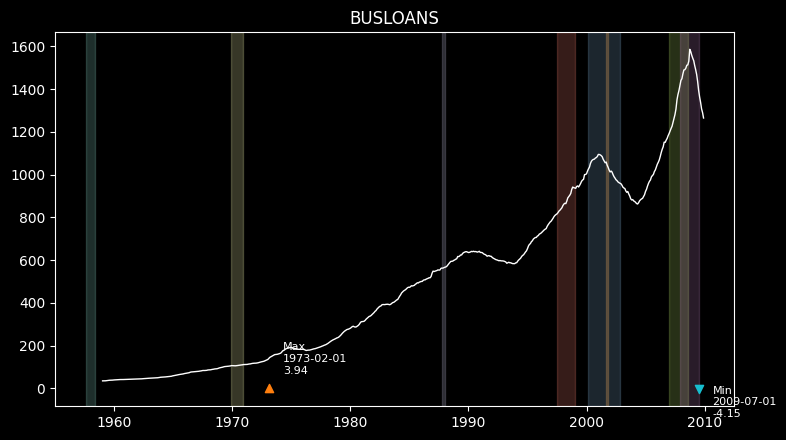

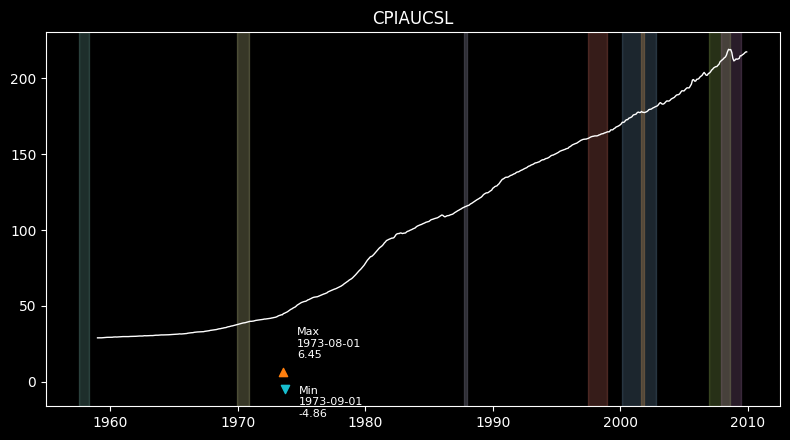

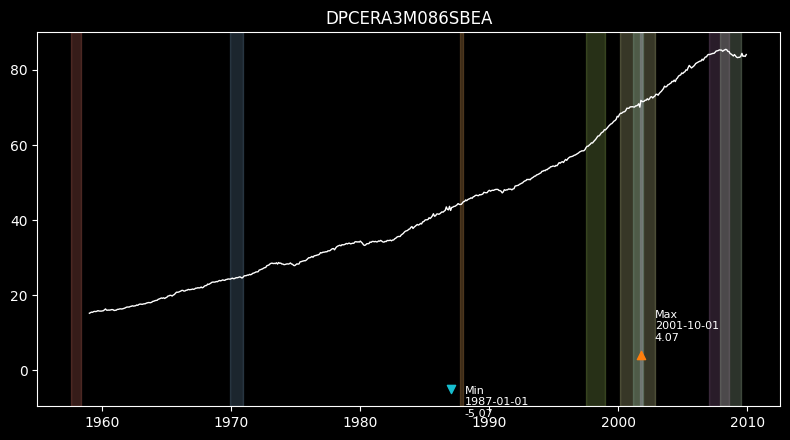

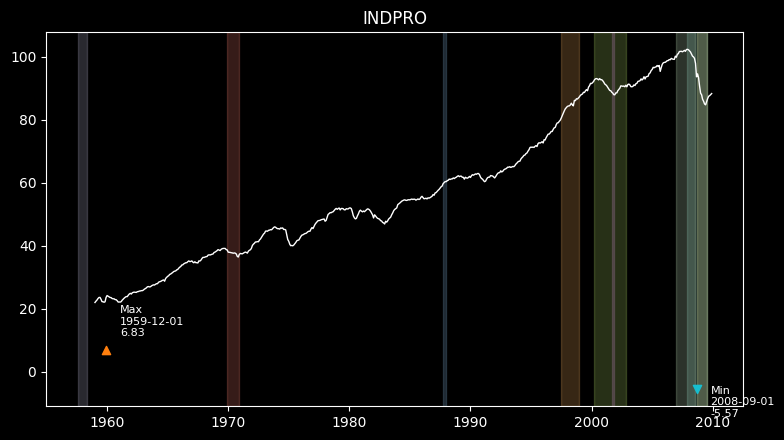

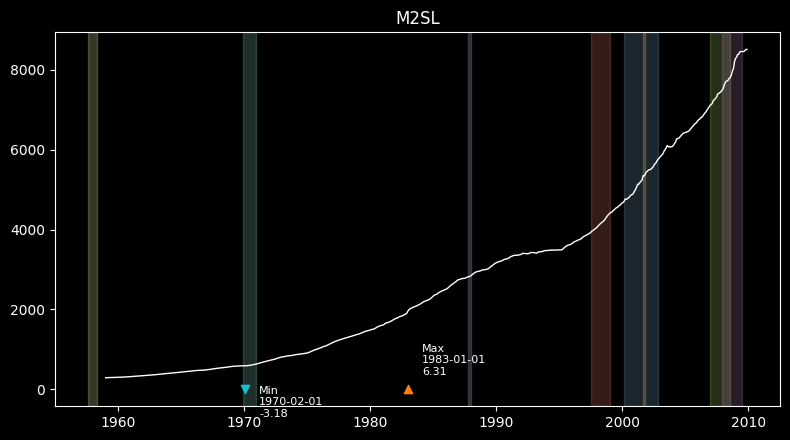

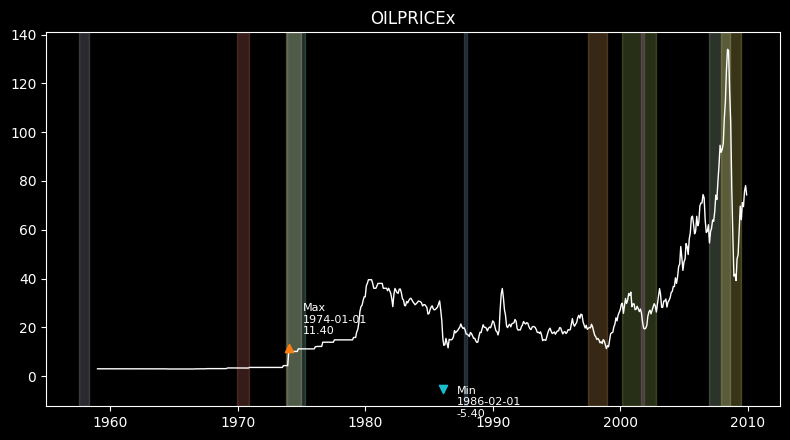

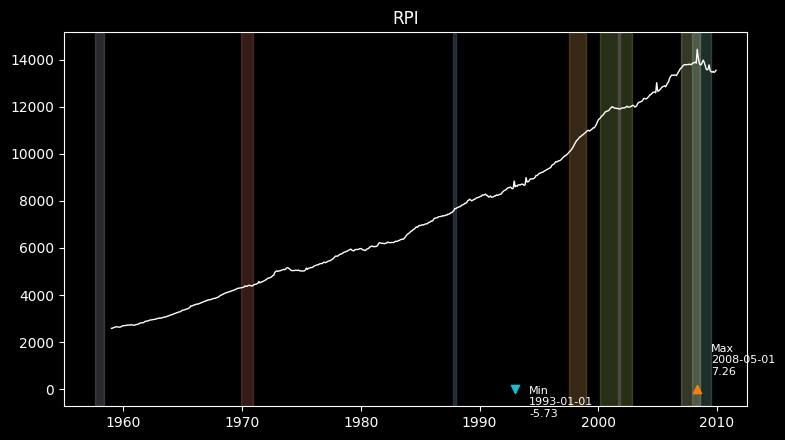

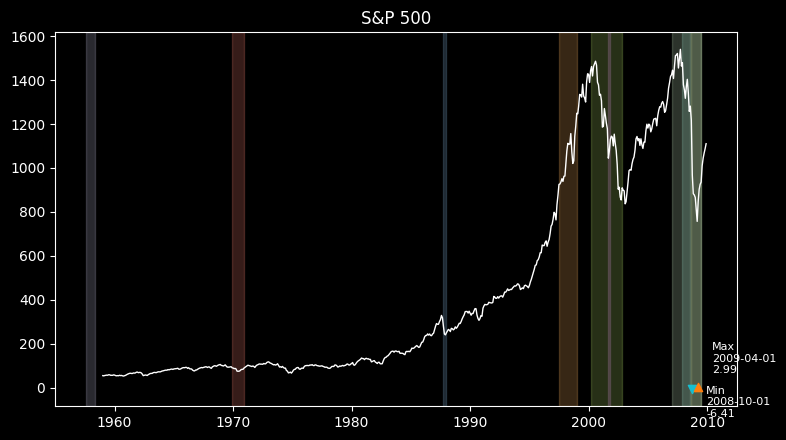

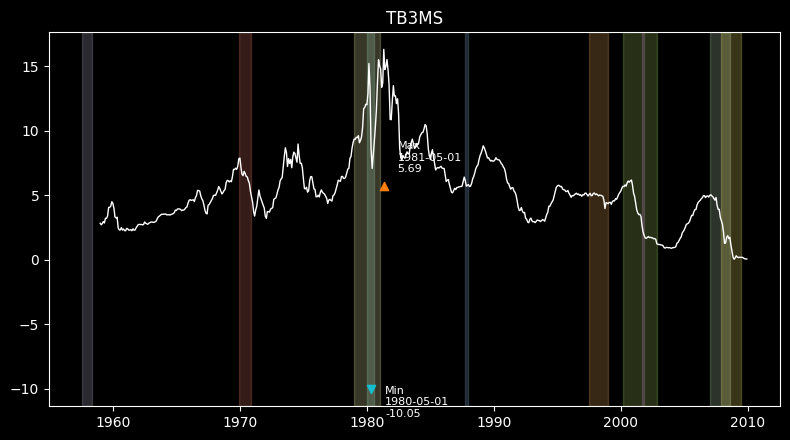

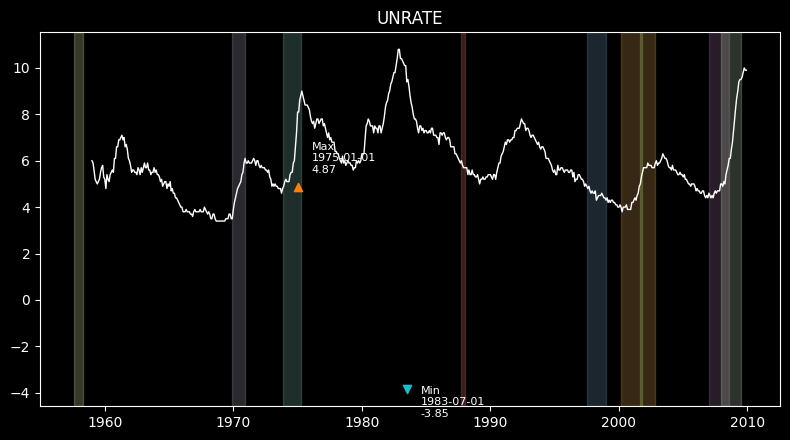

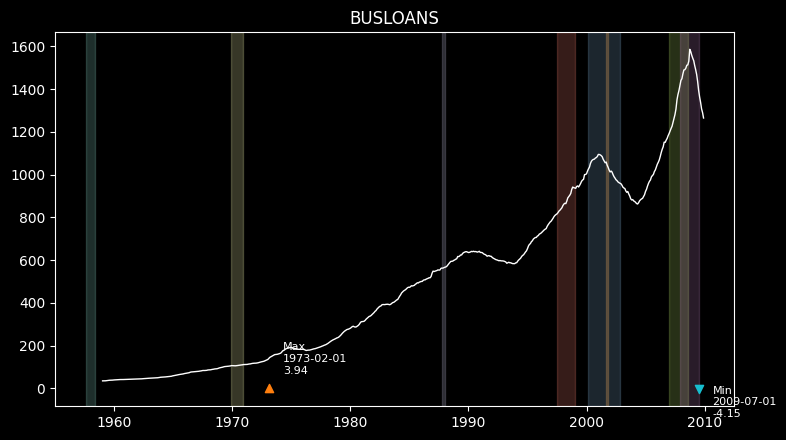

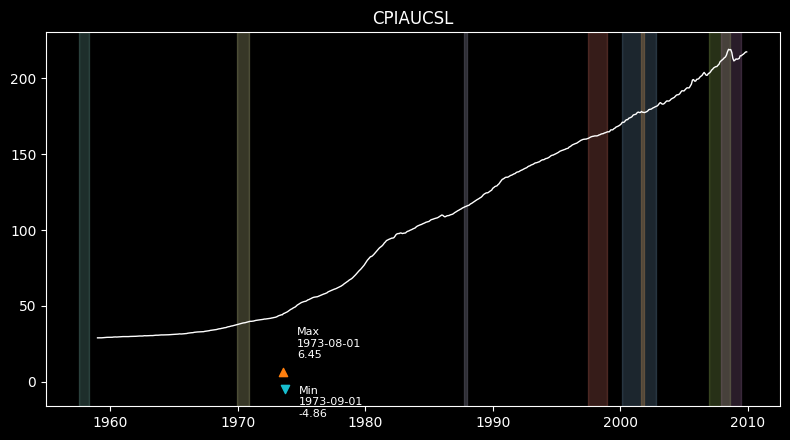

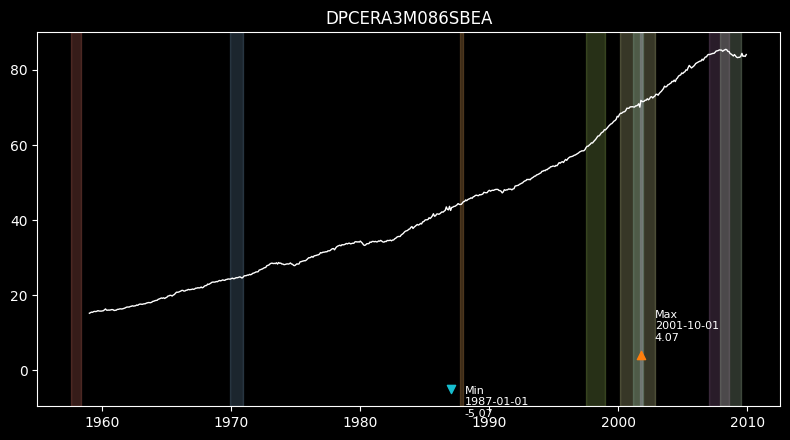

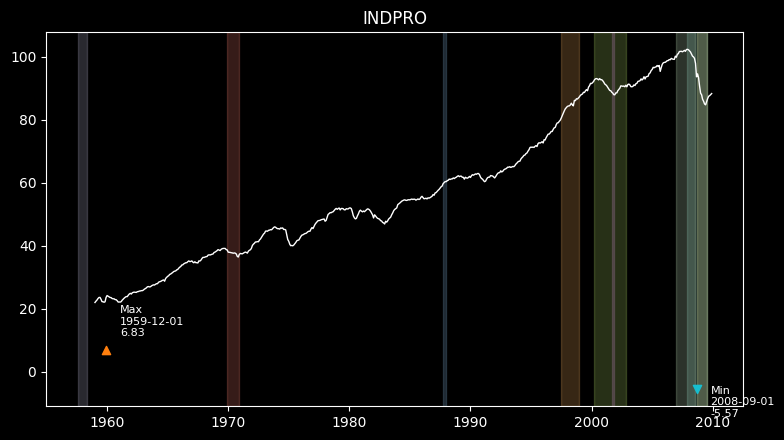

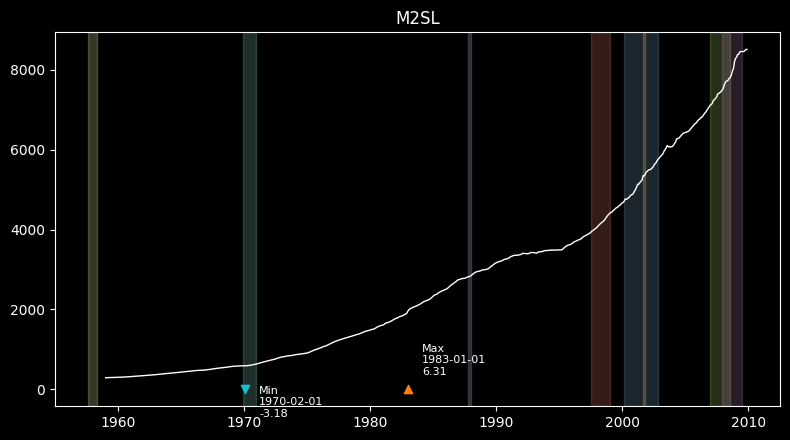

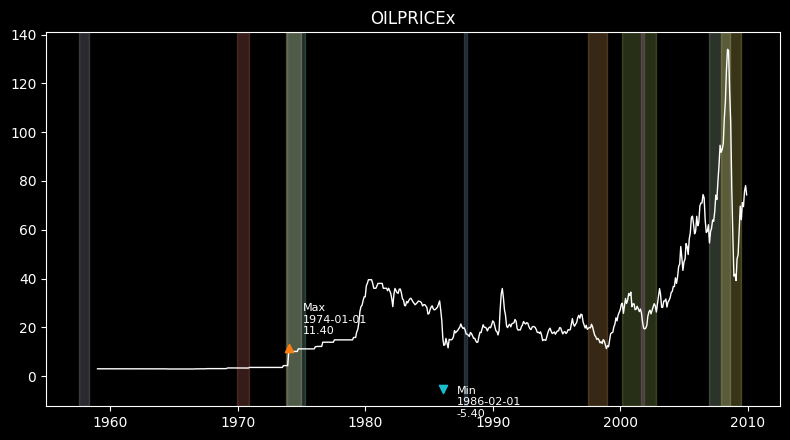

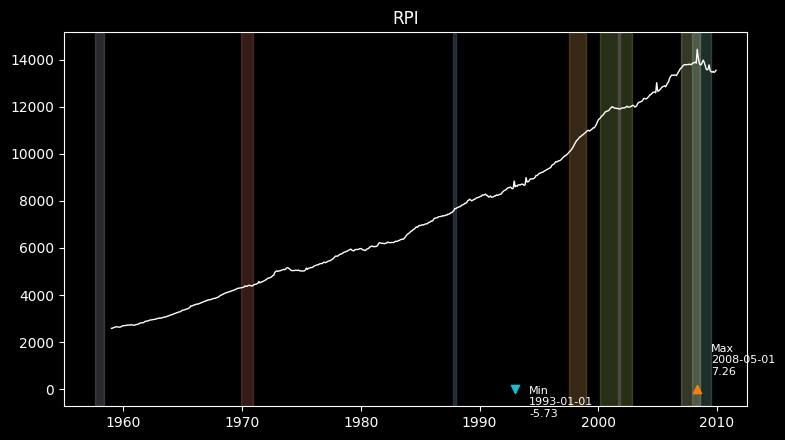

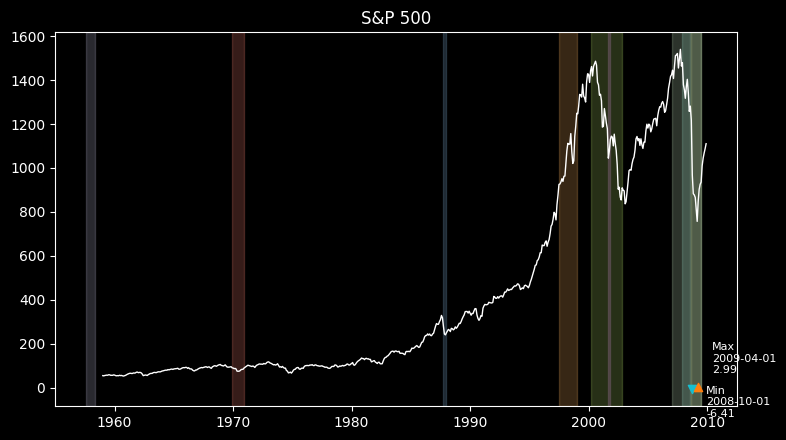

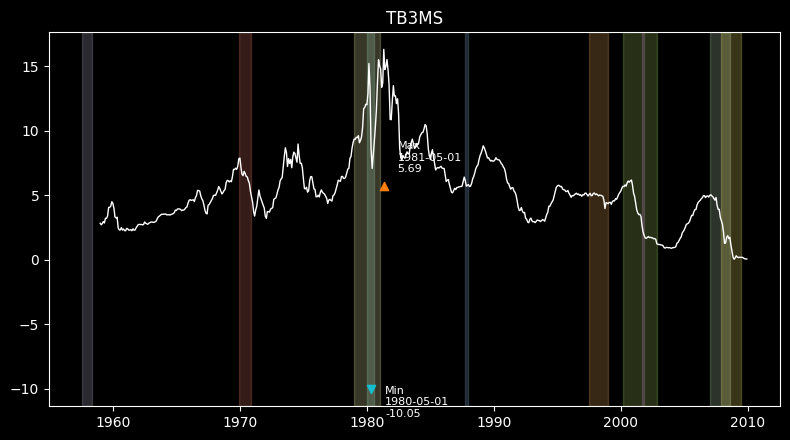

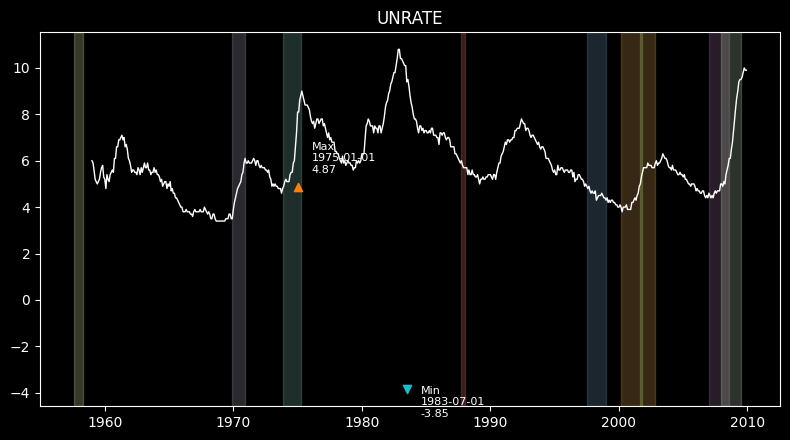

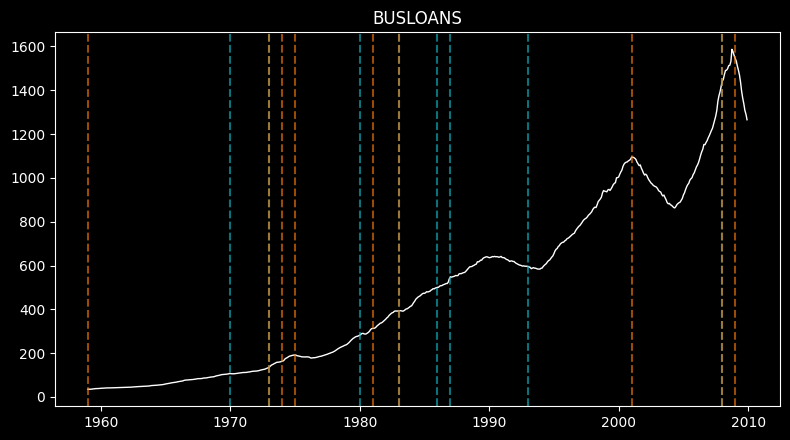

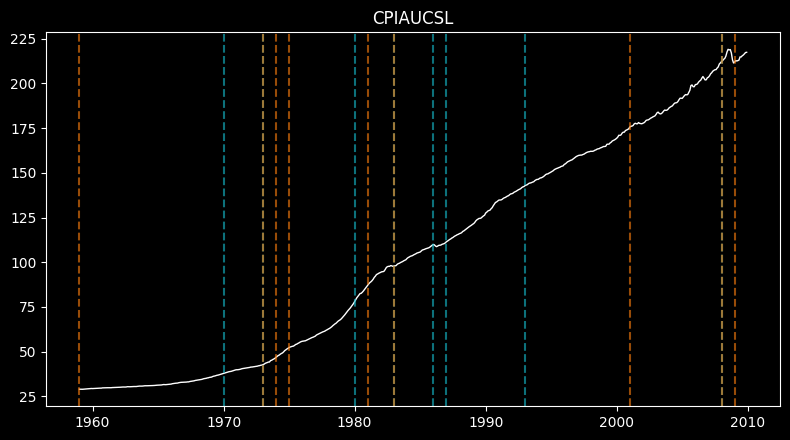

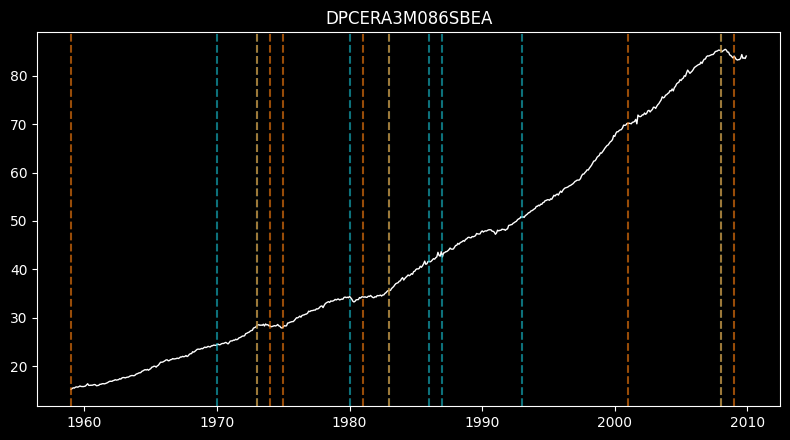

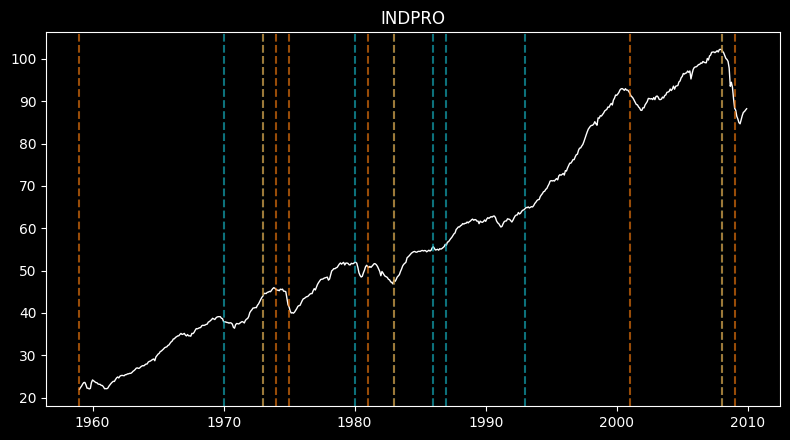

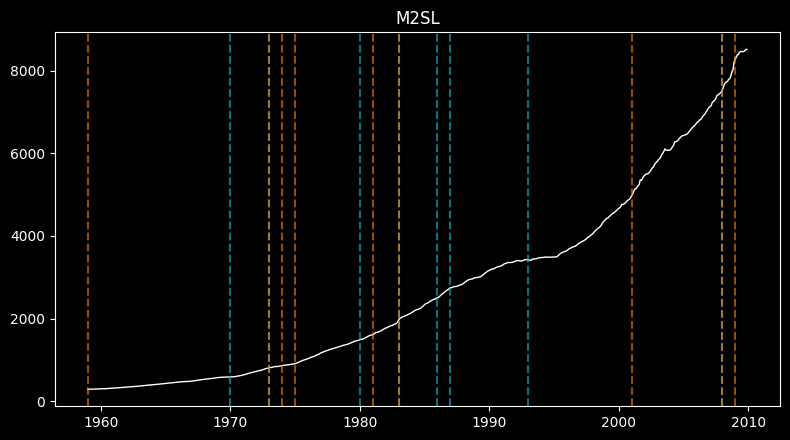

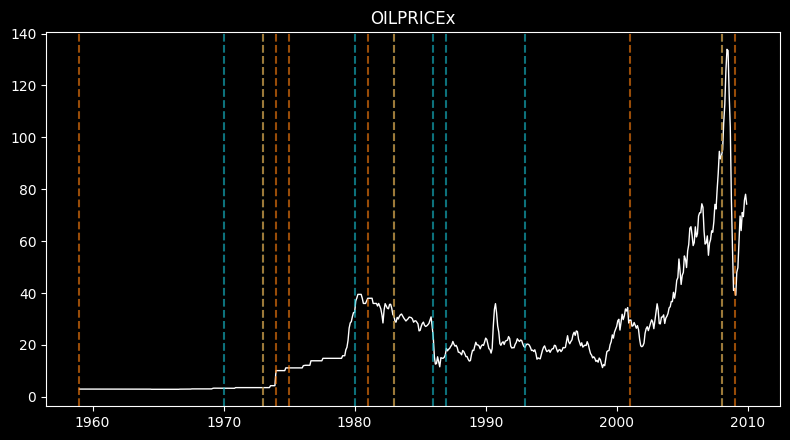

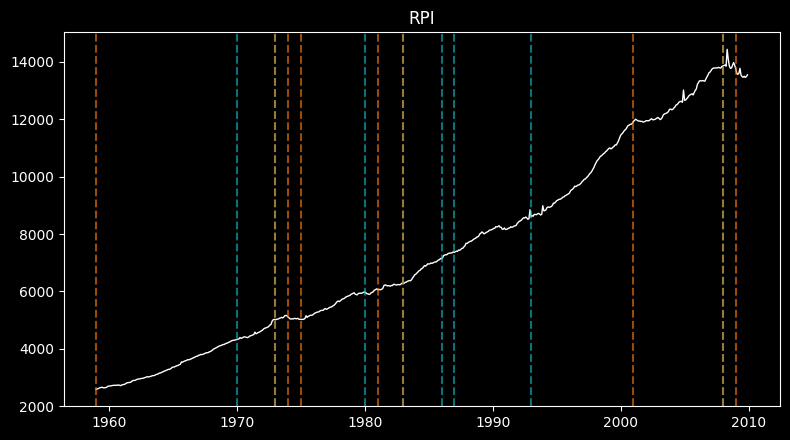

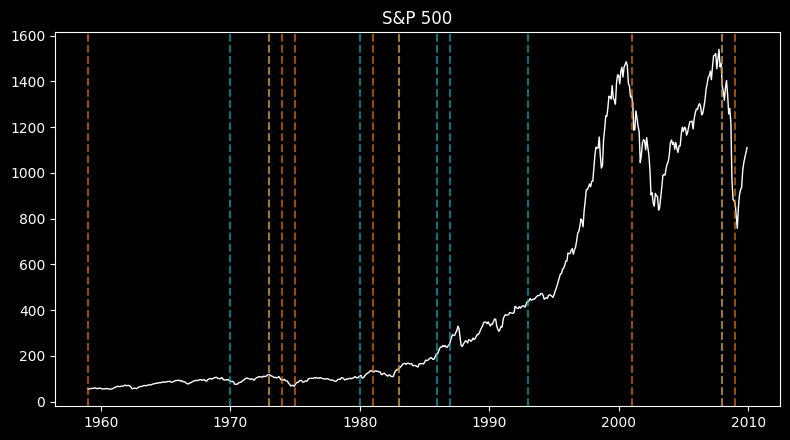

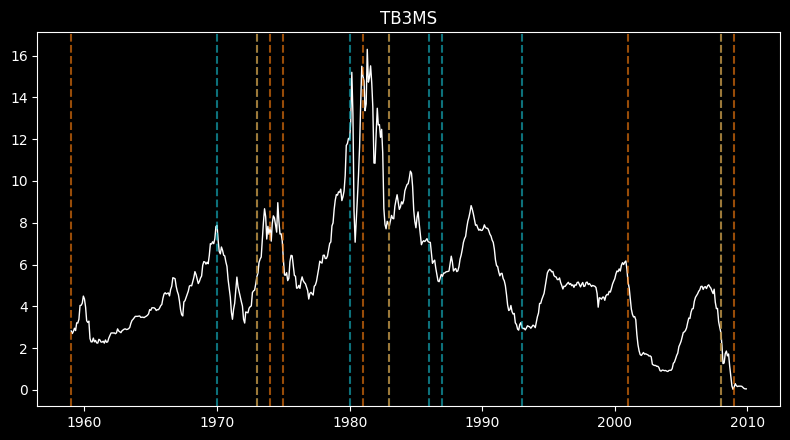

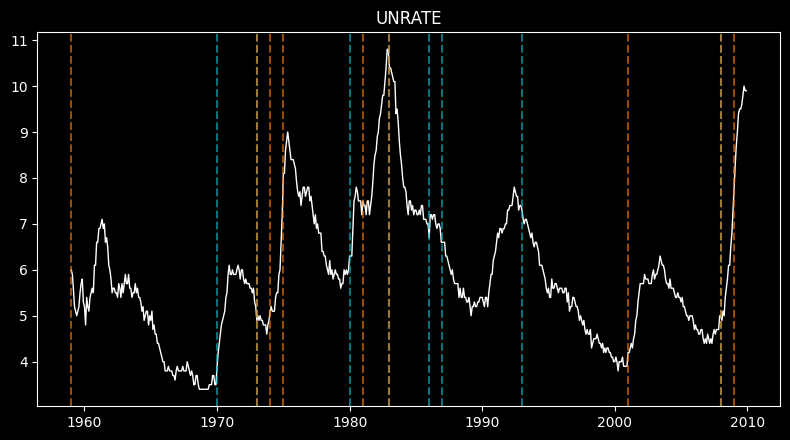

In [78]:
import matplotlib.pyplot as plt
from datetime import datetime

plt.style.use("dark_background")

# --- Années des min et max (données par toi) ---
years_min = [1983, 1980, 1993, 2008, 1987, 1973, 1986, 1970]
years_max = [1975, 1981, 2008, 1959, 2001, 2009, 1973, 1974, 1983]

# --- Format long ---
df_long = (
    df_train.reset_index()
            .melt(id_vars="sasdate", var_name="series", value_name="value")
            .dropna(subset=["value"])
            .sort_values(["series", "sasdate"])
)
df_long["sasdate"] = pd.to_datetime(df_long["sasdate"]).dt.date

# --- Tracé par série ---
for series_name, d in df_long.groupby("series"):
    fig, ax = plt.subplots(figsize=(8, 4.5))
    ax.plot(d["sasdate"], d["value"], linewidth=1, color="white")

    # Marquer les années min (lignes cyan pointillées)
    for y in years_min:
        ax.axvline(datetime(y, 1, 1), color="tab:cyan", linestyle="--", alpha=0.6)

    # Marquer les années max (lignes orange pointillées)
    for y in years_max:
        ax.axvline(datetime(y, 1, 1), color="tab:orange", linestyle="--", alpha=0.6)

    ax.set_title(series_name)
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.grid(False)
    plt.tight_layout()

plt.show()